0.9999999767771441
2.99999940194448
4.999989530390847
6.99988316888247
8.999060606903173


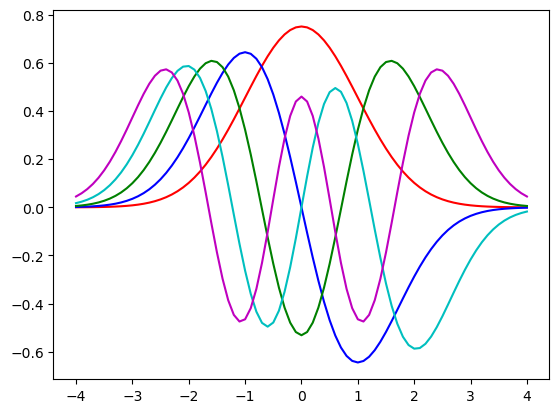

0.32322054760760577
(81, 5)
(5,)


In [114]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import RK45
import matplotlib.pyplot as plt

def shoot2(f, x, epsilon):
    return [f[1], (x ** 2 - epsilon ) * f[0]]

tol = 1e-6  # define a tolerance level 
col = ['r', 'b', 'g', 'c', 'm', 'k']  # eigenfunc colors

# def f0(epsilon):
#     return [1, np.sqrt(L**2-epsilon)]

#f0 = [1, np.sqrt(L**2-epsilon)]

n0 = 0.1; L = 4; xp = [-4, 4] 
xshoot =  np.arange(xp[0], xp[1] + 0.1 ,0.1)

epsilon_start = n0  # beginning value of epsilon

A1 = np.array([[]] * len(xshoot))
A2 = np.array([])

for modes in range(1, 6):  # begin mode loop
    epsilon = epsilon_start  # initial value of eigenvalue epsilon
    depsilon = n0   # default step size in epsilon
    for _ in range(1000):  # begin convergence loop for epsilon

        f0 = [1, np.sqrt(L**2-epsilon)]
        y = odeint(shoot2, f0, xshoot, args=(epsilon,)) 
        
        if abs(y[-1, 0]* np.sqrt(L**2-epsilon) + y[-1,1] - 0 ) < tol:  # check for convergence
            print(epsilon)  # write out eigenvalue
            
            A2 = np.append(A2, np.array([epsilon]), axis=0)
            
            break  # get out of convergence loop

        if (-1) ** (modes + 1) * (y[-1, 0]* np.sqrt(L**2-epsilon) + y[-1,1]) > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2
    
    epsilon_start = epsilon + 0.1  # after finding eigenvalue, pick new start
    norm = np.trapz(y[:, 0] * y[:, 0], xshoot)  # calculate the normalization
    
    A1 = np.append(A1, abs(np.array([y[:,0]/ np.sqrt(norm)])).transpose(), axis=1)
    plt.plot(xshoot, y[:, 0] / np.sqrt(norm), col[modes - 1])  # plot modes



plt.show()  # end mode loop

np.save('A1.npy', A1)
np.save('A2.npy', A2)

print(A1[71,4])

print(A1.shape)
print(A2.shape)